### **Introduction**  

Imagine a medical researcher working on a study to understand how patients respond to different treatments. The data comes from a group of patients who all had the same illness, but each responded to one of five medications: **Drug A, Drug B, Drug C, Drug X, or Drug Y**.  

The goal is to build a model that can help predict which drug might be the best option for a new patient with similar conditions. The dataset includes key medical details like:  

- **Age**  
- **Sex**  
- **Blood Pressure Level**  
- **Cholesterol Level**
- **Sodium to Potassium Ratio**

Since the target is to classify patients into one of multiple drug categories, this is a **multiclass classification problem**. By training a **Decision Tree model**, **Random Forest Model**, and comparing both on this data, we can make predictions about the most suitable drug for future patients based on their medical profile.

Data source: IBM

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'C:\Users\hp\Documents\Datasets\archive (12)\drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [5]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [6]:
df.duplicated().sum()

0

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

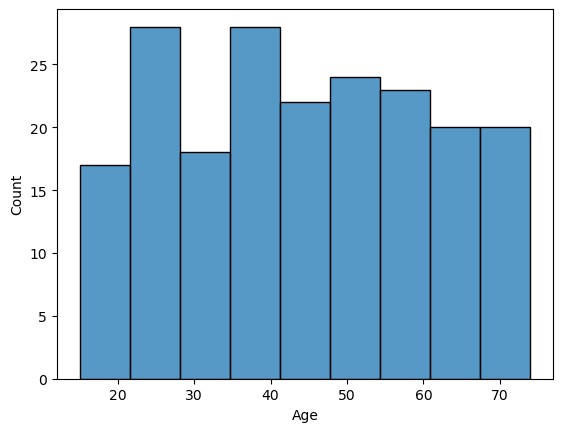

In [7]:
sns.histplot(df['Age'])

<Axes: ylabel='count'>

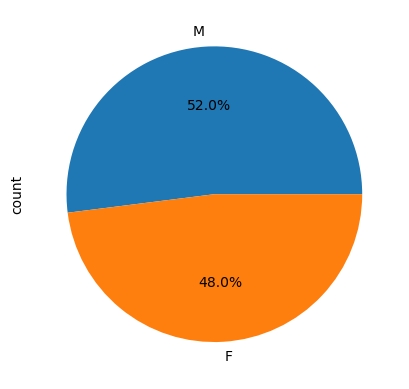

In [8]:
df['Sex'].value_counts().plot.pie(autopct='%1.1f%%')

# Preprocessing

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat = ['Drug', 	'Sex', 'BP', 'Cholesterol', 'Drug']
for col in cat:
    df[col] = le.fit_transform(df[col])

# Model Building

In [12]:
from sklearn.model_selection import train_test_split
y = df['Drug']
X = df.drop('Drug', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=26)

In [13]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=26)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted') # 'Weighted' to handle imbalance
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

0.94

In [32]:
print(f"acc: {acc:.4f}")
print(f"precision: {precision:.4f}")
print(f"recall: {recall:.4f}")
print(f"f1 Score: {f1:.4f}")

acc: 0.9400
precision: 0.9524
recall: 0.9400
f1 Score: 0.9403


In [34]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.75      0.86         8
           2       1.00      1.00      1.00         4
           3       1.00      0.92      0.96        13
           4       0.95      1.00      0.98        20

    accuracy                           0.94        50
   macro avg       0.93      0.93      0.93        50
weighted avg       0.95      0.94      0.94        50



### **Conclusion**  

The Decision Tree model classified the drug responses with an **overall accuracy of 94%**. The precision, recall, and F1-scores vary across the different drug classes, with some classes achieving perfect scores while others show slight variations.  

These results reflect how the model distinguishes between different drug responses based on patient features, providing a structured way to predict medication choices for future patients.

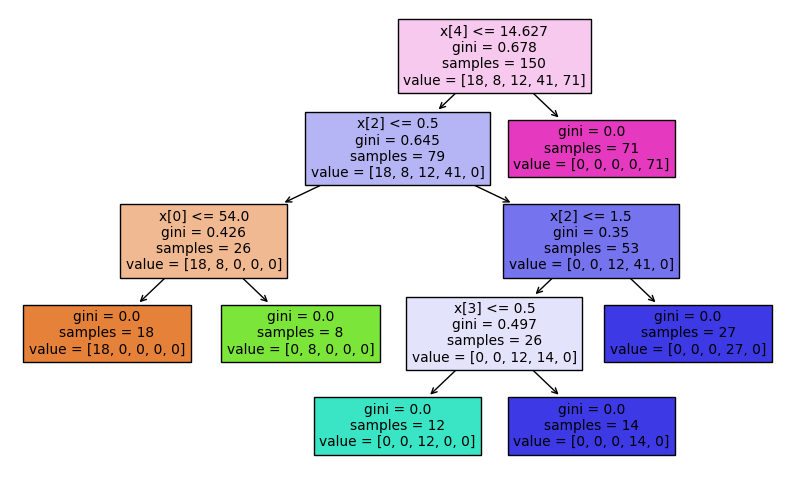

In [38]:
# To plot tree
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 6))
plot_tree(tree, filled=True)
plt.show()

## To compare the model to a Random Forest Classifier model

#### Random Forest Classifier

In [44]:
from sklearn.ensemble import RandomForestClassifier

mod = RandomForestClassifier(n_estimators=100, class_weight="balanced", random_state=42)
mod.fit(X_train, y_train)
y_pred2 = mod.predict(X_test)

In [45]:
# Metrics
accuracy = accuracy_score(y_test, y_pred2)
precision = precision_score(y_test, y_pred2, average='weighted') # 'Weighted' to handle imbalance
recall = recall_score(y_test, y_pred2, average='weighted')
f1 = f1_score(y_test, y_pred2, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred2))

Accuracy: 0.9200
Precision: 0.9435
Recall: 0.9200
F1 Score: 0.9198

Classification Report:
              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       1.00      0.62      0.77         8
           2       1.00      1.00      1.00         4
           3       1.00      0.92      0.96        13
           4       0.95      1.00      0.98        20

    accuracy                           0.92        50
   macro avg       0.92      0.91      0.89        50
weighted avg       0.94      0.92      0.92        50



### **Conclusion**  

The Random Forest model performed well, achieving an **accuracy of 92%**. It strikes a good balance between precision and recall, making it a reliable choice for predicting the best drug for a patient. 